# Understanding the geometry of the synthetic data relative to the geometry of the real data

## I. Real Data

### i. Load Real Data

In [1]:
%pylab inline
import pandas as pd
from scipy.spatial import distance
from itertools import combinations

ovarian = pd.read_csv('data_preparation/proteomics_data/raw/ovarian_proteomics.cleaned.normalized.csv', header=0, index_col=0).fillna(0)
ovarian.head()

Populating the interactive namespace from numpy and matplotlib


,PNNL-TCGA-09-1664,PNNL-TCGA-13-1484,PNNL-TCGA-13-1488,PNNL-TCGA-13-1489,PNNL-TCGA-13-1494,PNNL-TCGA-13-1495,PNNL-TCGA-13-1499,PNNL-TCGA-13-2071,PNNL-TCGA-23-1123,PNNL-TCGA-23-1124,...,JHU-TCGA-61-1911,JHU-TCGA-61-1914,JHU-TCGA-61-1915,JHU-TCGA-61-1918,JHU-TCGA-61-1995,JHU-TCGA-61-2008,JHU-TCGA-61-2087,JHU-TCGA-61-2088,JHU-TCGA-61-2094,JHU-TCGA-61-2613
A1BG,0.2560,-1.060,-0.0348,0.0390,-0.49700,0.34700,-0.282,0.438,-0.631,-0.9280,...,-0.22430,-0.70530,-0.30090,-0.00830,-0.29820,0.86970,-1.11530,-0.83830,-0.06730,0.90970
A2M,-0.0581,-0.688,0.5180,-0.4320,0.33300,0.10900,-1.230,0.172,-1.270,-0.0129,...,0.26575,-0.68825,-0.07125,-0.76725,-0.82125,-0.36055,-1.02225,-1.17225,-0.13225,1.16575
A2ML1,-0.3360,-0.973,0.7980,0.0000,-0.08010,0.62800,0.551,-1.650,0.000,-0.7840,...,0.45120,-0.34180,-1.15880,-0.24280,0.64220,0.60620,0.77920,0.44120,0.03020,0.08930
AAAS,-0.0363,-0.657,0.1290,0.0873,0.00218,-0.00385,0.110,-0.228,0.190,-0.1370,...,-0.20516,-0.24216,0.45984,0.17584,0.07238,0.04764,-0.04616,0.62984,0.11074,-0.12116
AACS,-0.0648,-0.165,-0.3930,-0.5020,-0.62300,-0.47800,0.000,-0.312,0.044,-0.4150,...,-0.01380,0.68060,0.44660,0.11690,0.18860,-0.56140,-0.01400,0.72060,0.26160,0.02367


In [2]:
ovarian_labels = pd.read_csv('/Users/alex/Documents/proteomics/data_preparation/proteomics_data/raw/ovarian_labels.csv', index_col=0)
ovarian_labels = ovarian_labels['Proteomic subtype'].replace(np.nan, 'nan').values
len(ovarian_labels)

206

### ii. Get the means for each class

In [3]:
ovarian = ovarian.transpose()

Differentiated = ovarian[ovarian_labels == 'Differentiated']
Immunoreactive = ovarian[ovarian_labels == 'Immunoreactive']
Mesenchymal = ovarian[ovarian_labels == 'Mesenchymal']
Proliferative = ovarian[ovarian_labels == 'Proliferative']
Stromal = ovarian[ovarian_labels == 'Stromal']
nan = ovarian[ovarian_labels == 'nan']

In [4]:
Differentiated_mean = Differentiated.mean()
Immunoreactive_mean = Immunoreactive.mean()
Mesenchymal_mean = Mesenchymal.mean()
Proliferative_mean = Proliferative.mean()
Stromal_mean = Stromal.mean()
nan_mean = nan.mean()

### iii. Find all pairwise distances

In [5]:
distances = pd.DataFrame([distance.euclidean(a,b) for a,b in combinations([Differentiated_mean,Immunoreactive_mean,Mesenchymal_mean,Proliferative_mean,Stromal_mean,nan_mean],2)])

In [6]:
distances

,0
0,15.879834
1,17.359174
2,21.189180
3,26.877732
4,20.110938
5,20.622562
6,22.534145
7,32.335380
8,25.248076
9,28.419521


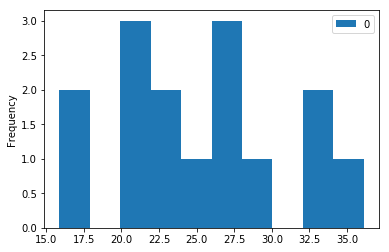

In [7]:
distances.plot.hist()

## II. Synthetic Data by original upsampling strategy

### i. Load Synthetic Data

In [8]:
synthetic = pd.read_csv('synthetic_proteomics/generated_data/ludwig_svd_normals/hsa04010_inbiomap_exp.csv', index_col=0)
synthetic.head()

,ZNF91,NDEL1,ELAVL1,SUMO1,SUMO3,CHMP5,UBC,HTT,E2F4,ACP5,...,SPANXN4,ZNF605,SERPINB10,ANKAR,RRH,DHH,CYSLTR1,ZNF268,COL23A1,MEDAG
hsa04010,0.0,0.285224,0.643828,0.542200,-0.447987,0.218837,-0.0,-0.019012,0.743505,-0.351974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
negative,-0.0,0.046622,-0.249768,-0.267652,-0.532723,0.160892,-0.0,0.127052,0.033737,0.089601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
negative,-0.0,-0.511173,0.089534,0.898882,-0.145523,-0.021377,0.0,-0.379183,-0.073551,-0.478076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
negative,0.0,-0.079820,-0.397150,-0.385432,-0.419035,0.149168,0.0,0.155897,0.743164,-0.389875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
negative,-0.0,0.149707,-0.128439,-0.243953,-0.066834,0.471421,0.0,0.240100,0.096536,0.168752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### ii. Get the means for each class

In [9]:
hsa04010 = synthetic.loc['hsa04010']
negative = synthetic.loc['negative']

In [10]:
hsa04010_mean = hsa04010.mean()
negative_mean = negative.mean()

### iii. Compute Distance

In [11]:
distance.euclidean(hsa04010_mean, negative_mean)

5.812306142520208

## III. Synthetic data by newer "gaussian mixture" strategy

### i. Load Synthetic Data

In [14]:
synthetic = pd.read_csv('synthetic_proteomics/generated_data/ludwig_svd_normals_gaussian_mixture/hsa04010_inbiomap_exp.csv', index_col=0)
synthetic.head()

,ZNF91,NDEL1,ELAVL1,SUMO1,SUMO3,CHMP5,UBC,HTT,E2F4,ACP5,...,SPANXN4,ZNF605,SERPINB10,ANKAR,RRH,DHH,CYSLTR1,ZNF268,COL23A1,MEDAG
hsa04010,-0.0,0.158690,-0.394318,0.048283,-0.201953,-0.790005,0.0,-0.165628,-0.265260,-0.406883,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
negative,0.0,0.305709,-0.002625,-0.589600,0.533584,-0.102741,0.0,0.193306,-0.206218,-0.307823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
negative,0.0,0.029672,0.094166,-0.203532,-0.054745,0.267907,-0.0,-0.283995,-0.284301,0.457806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
negative,0.0,-0.380300,0.640951,0.198824,0.171792,-0.218459,-0.0,-0.328153,0.171313,-0.475737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa04010,0.0,-0.045509,-0.015171,0.203484,0.123955,0.281097,0.0,-0.224586,0.432370,0.108690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### ii. Get the means for each class

In [15]:
hsa04010 = synthetic.loc['hsa04010']
negative = synthetic.loc['negative']

In [16]:
hsa04010_mean = hsa04010.mean()
negative_mean = negative.mean()

### iii. Compute Distance

In [17]:
distance.euclidean(hsa04010_mean, negative_mean)

7.969267019495971